In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('F:/Kaggle/Bill authentication/bill_authentication.csv')
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data.shape

(1372, 5)

In [5]:
train, test = train_test_split(data, test_size=0.25)
X = train[train['Class'].isin([0, 1])]
Y = train[train['Class'].isin([0, 1])]['Class']
X = X.drop(['Class'], axis = 1)

In [6]:
def sigmoid(z):
    s = 1.0/ (1 + np.exp(-z))
    return s

In [7]:
def network_architecture(X, Y):
    n_x = X.shape[0] # nodes in input layer
    n_h = 10 # nodes in hidden layer
    n_y = Y.shape[0] # nodes in output layer
    return (n_x, n_h, n_y)


In [8]:
def define_network_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) * 0.01 # random initialization
    b1 = np.zeros((n_h, 1)) # zero initialization
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

In [9]:
def forward_propagation(X, params):
    Z1 = np.dot(params['W1'], X)+params['b1']
    A1 = sigmoid(Z1)
    Z2 = np.dot(params['W2'], A1)+params['b2']
    A2 = sigmoid(Z2)
    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

In [11]:
def compute_error(Predicted, Actual):
    logprobs = np.multiply(np.log(Predicted), Actual)+ np.multiply(np.log(1-Predicted), 1-Actual)
    cost = -np.sum(logprobs) / Actual.shape[1]
    return np.squeeze(cost)

In [12]:
def backward_propagation(params, activations, X, Y):
    m = X.shape[1]
    # output layer
    dZ2 = activations['A2'] - Y
    dW2 = np.dot(dZ2, activations['A1'].T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    # hidden layer
    dZ1 = np.dot(params['W2'].T, dZ2) * (1 -np.power(activations['A1'], 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

In [13]:
def update_parameters(params, derivatives, alpha=1.2):
    params['W1'] = params['W1'] - alpha * derivatives['dW1']
    params['b1'] = params['b1'] - alpha * derivatives['db1']
    params['W2'] = params['W2'] - alpha * derivatives['dW2']
    params['b2'] = params['b2'] - alpha * derivatives['db2']
    return params

In [14]:
def neural_network(X, Y, n_h, num_iterations):
        n_x = network_architecture(X, Y)[0]
        n_y = network_architecture(X, Y)[2]
        params = define_network_parameters(n_x, n_h, n_y)
        for i in range(0, num_iterations):
            results = forward_propagation(X, params)
            error = compute_error(results['A2'], Y)
            derivatives = backward_propagation(params, results, X, Y)
            params = update_parameters(params, derivatives)
        return params

In [15]:
y = Y.values.reshape(1, Y.size)
x = X.T

In [16]:
def predict(parameters, X):
    results = forward_propagation(X, parameters)
    print (results['A2'][0])
    predictions = np.around(results['A2'])
    return predictions

In [17]:
model = neural_network(x, y, n_h = 10, num_iterations = 50)

In [20]:
predictions = predict(model, x)
print ('Accuracy: %d' % float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) + '%')
print (float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100))

[0.04904852 0.63844433 0.20738286 ... 0.04904859 0.04908534 0.99175113]
Accuracy: 94%
94.75218658892129


In [21]:
list_k = list( range(10,1000,20))
print("List_K : ")
print(list_k)
acc = []
list_k1 = list( range(1,50))
for nn in list_k:
    model = neural_network(x, y, n_h = 10, num_iterations = nn)
    predictions = predict(model, x)
    acc.append(float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100))
print("Accuracy :")
print(acc)

List_K : 
[10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990]
[0.1719447  0.27219746 0.44579584 ... 0.17512152 0.17919232 0.65449884]
[0.05733004 0.36924945 0.25892017 ... 0.05740274 0.05887208 0.9732793 ]
[0.04340256 0.66499207 0.2025268  ... 0.04340213 0.04356355 0.99601759]
[0.04442685 0.81038401 0.16786262 ... 0.04442685 0.04442775 0.99906639]
[0.03980455 0.58461703 0.18628889 ... 0.03980243 0.03985949 0.98930489]
[0.04764757 0.9167851  0.1058998  ... 0.04764757 0.04764757 0.99921803]
[0.04795879 0.91056515 0.10212403 ... 0.04795879 0.04795879 0.99873941]


C:\Users\we\AppData\Local\Temp/ipykernel_16960/3293153896.py:2: RuntimeWarning: overflow encountered in exp
  s = 1.0/ (1 + np.exp(-z))


[0.03136779 0.96703102 0.13711071 ... 0.03126397 0.03126397 0.96299221]
[0.04995169 0.96614129 0.07303266 ... 0.04995169 0.04995169 0.9995911 ]
[0.05177913 0.96692672 0.06693735 ... 0.05177913 0.05177913 0.99962809]
[0.0466102  0.98038192 0.05842135 ... 0.0466102  0.0466102  0.99976846]
[0.02225049 0.9863821  0.07486374 ... 0.02225049 0.0222505  0.99945864]
[0.05226958 0.9860822  0.05946325 ... 0.05226958 0.05226958 0.9997555 ]
[0.04902497 0.97306126 0.05530376 ... 0.04902497 0.04902497 0.99958617]
[0.05063214 0.97548837 0.05224839 ... 0.05063214 0.05063212 0.99960278]
[0.03530001 0.97371537 0.06658326 ... 0.0353683  0.03530035 0.9998457 ]
[0.05554558 0.98124072 0.04554489 ... 0.05553847 0.05500609 0.99972503]
[0.05429394 0.99523123 0.05589123 ... 0.05429394 0.05429394 0.99993749]
[0.05158184 0.99428618 0.05677287 ... 0.05158184 0.05158184 0.99990113]
[0.05147222 0.99420907 0.05919167 ... 0.05147222 0.05147222 0.99990171]
[0.05520027 0.99421772 0.05692717 ... 0.05520027 0.05520027 0.99

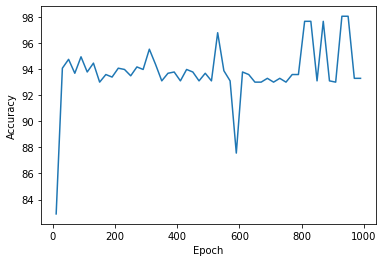

In [22]:
plt.plot( list_k, acc )
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()